In [4]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE=256
BATCH_SIZE=32

In [6]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'chess'

In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

# It is in 68 batches . Each batch has 32 items....

68

In [6]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 2 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1]


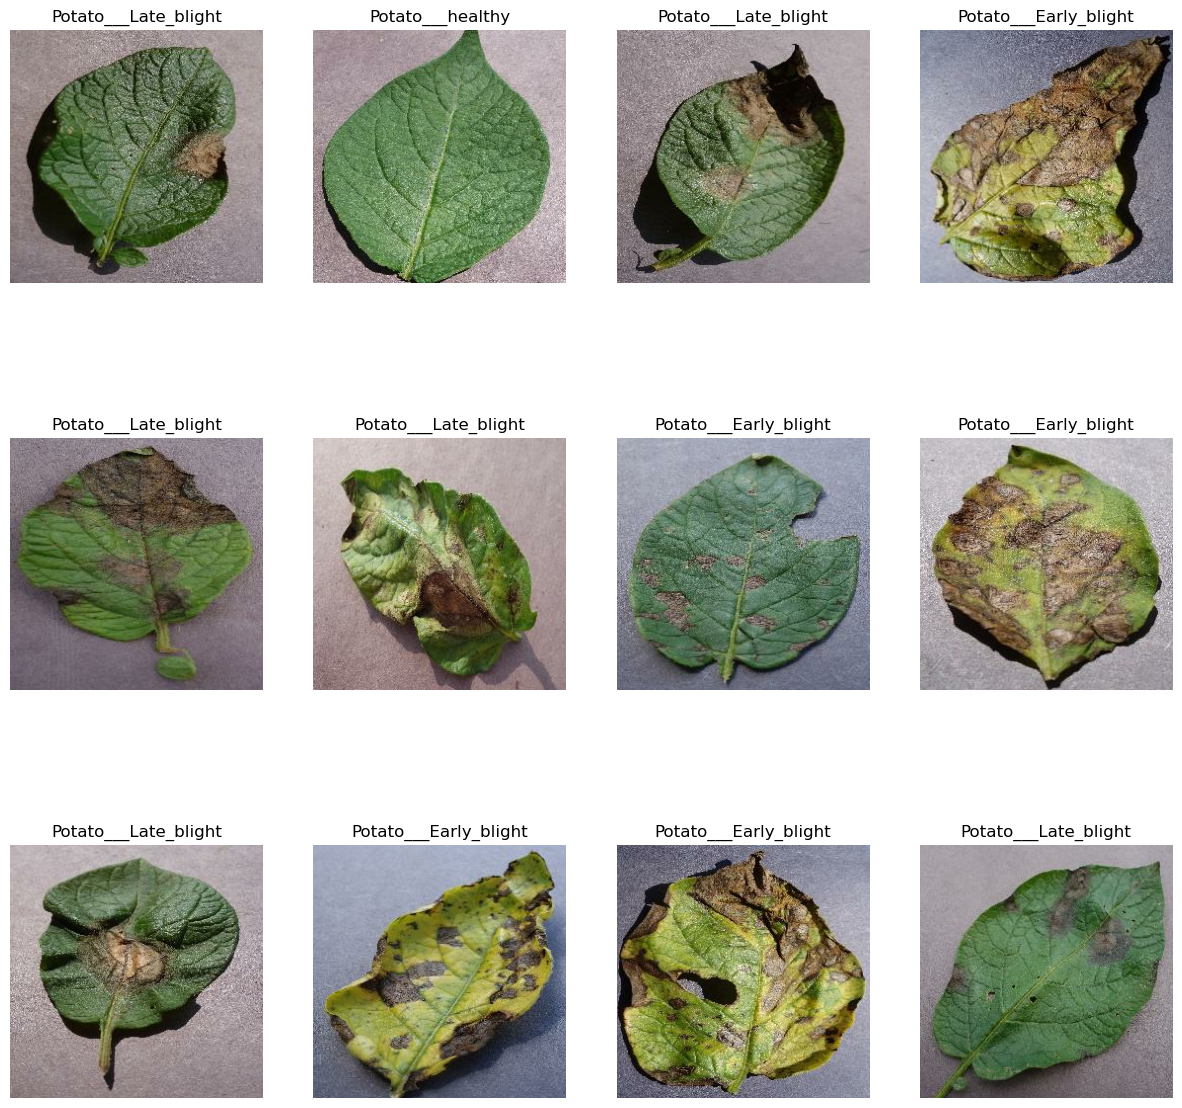

In [7]:
plt.figure(figsize=(15,15))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.title(class_names[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis("off")

In [8]:
def get_dataset_partition_tf(ds , train_split=0.8 , val_split=0.1 , test_split=0.1 , shuffle=True , shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(train_split * ds_size)
    val_size=int(val_split * ds_size)
    
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds , val_ds , test_ds

In [9]:
train_ds , val_ds , test_ds = get_dataset_partition_tf(dataset)

In [10]:
len(train_ds)

54

In [11]:
 len(val_ds) 

6

In [12]:
len(test_ds)

8

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
# RESIZING AN RESCALING
resize_and_rescale = tf.keras.Sequential([
    
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

In [15]:
# DATA AUGMENTATION

data_augmentation = tf.keras.Sequential([
    
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

In [16]:
CHANNELS=3

In [17]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=3

In [18]:
model = models.Sequential([
    
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    
    layers.Dense(n_classes , activation='softmax')
    
    
    
    
])

In [19]:
model.build(input_shape=input_shape)

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [21]:
model.compile(
    
    optimizer='adam',
    
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    
    metrics=['accuracy']
)

In [22]:
EPOCHS=18

In [23]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/18
54/54 [==============================] - 95s 2s/step - loss: 0.9018 - accuracy: 0.5197 - val_loss: 0.9413 - val_accuracy: 0.4740
Epoch 2/18
54/54 [==============================] - 92s 2s/step - loss: 0.6648 - accuracy: 0.7043 - val_loss: 0.7929 - val_accuracy: 0.6562
Epoch 3/18
54/54 [==============================] - 91s 2s/step - loss: 0.4255 - accuracy: 0.8096 - val_loss: 0.2814 - val_accuracy: 0.8646
Epoch 4/18
54/54 [==============================] - 91s 2s/step - loss: 0.2722 - accuracy: 0.8825 - val_loss: 0.1516 - val_accuracy: 0.9427
Epoch 5/18
54/54 [==============================] - 91s 2s/step - loss: 0.2039 - accuracy: 0.9207 - val_loss: 0.1474 - val_accuracy: 0.9427
Epoch 6/18
54/54 [==============================] - 91s 2s/step - loss: 0.2042 - accuracy: 0.9144 - val_loss: 0.2740 - val_accuracy: 0.8958
Epoch 7/18
54/54 [==============================] - 91s 2s/step - loss: 0.2194 - accuracy: 0.9155 - val_loss: 0.1381 - val_accuracy: 0.9323
Epoch 8/18
54/54 [==

In [24]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 5s 389ms/step - loss: 0.1399 - accuracy: 0.9453


In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training VS Validation Losses')

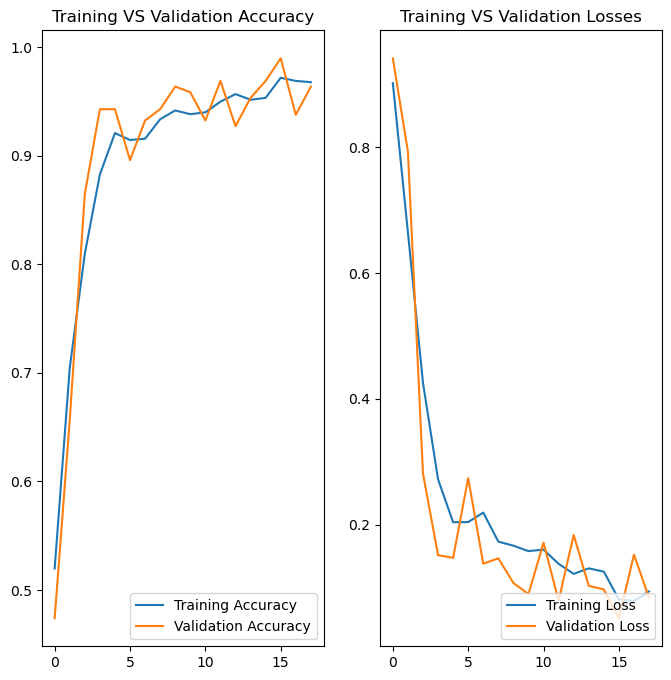

In [26]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc , label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc , label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training VS Validation Accuracy")


plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss , label='Training Loss')
plt.plot(range(EPOCHS), val_loss , label='Validation Loss')
plt.legend(loc='lower right')
plt.title("Training VS Validation Losses")

Actual Label :  Potato___Late_blight
Predicted Label :  Potato___Late_blight


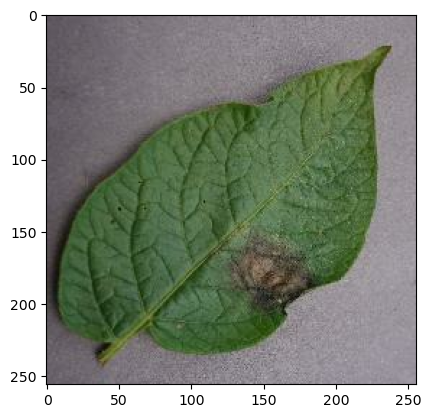

In [27]:
import numpy as np
for image_batch,label_batch in test_ds.take(1):
    
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()
    
    plt.imshow(first_image)
    
    print("Actual Label : ", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted Label : ", class_names[np.argmax(batch_prediction[0])])
    
    

In [28]:
def predict(model , img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class , confidence

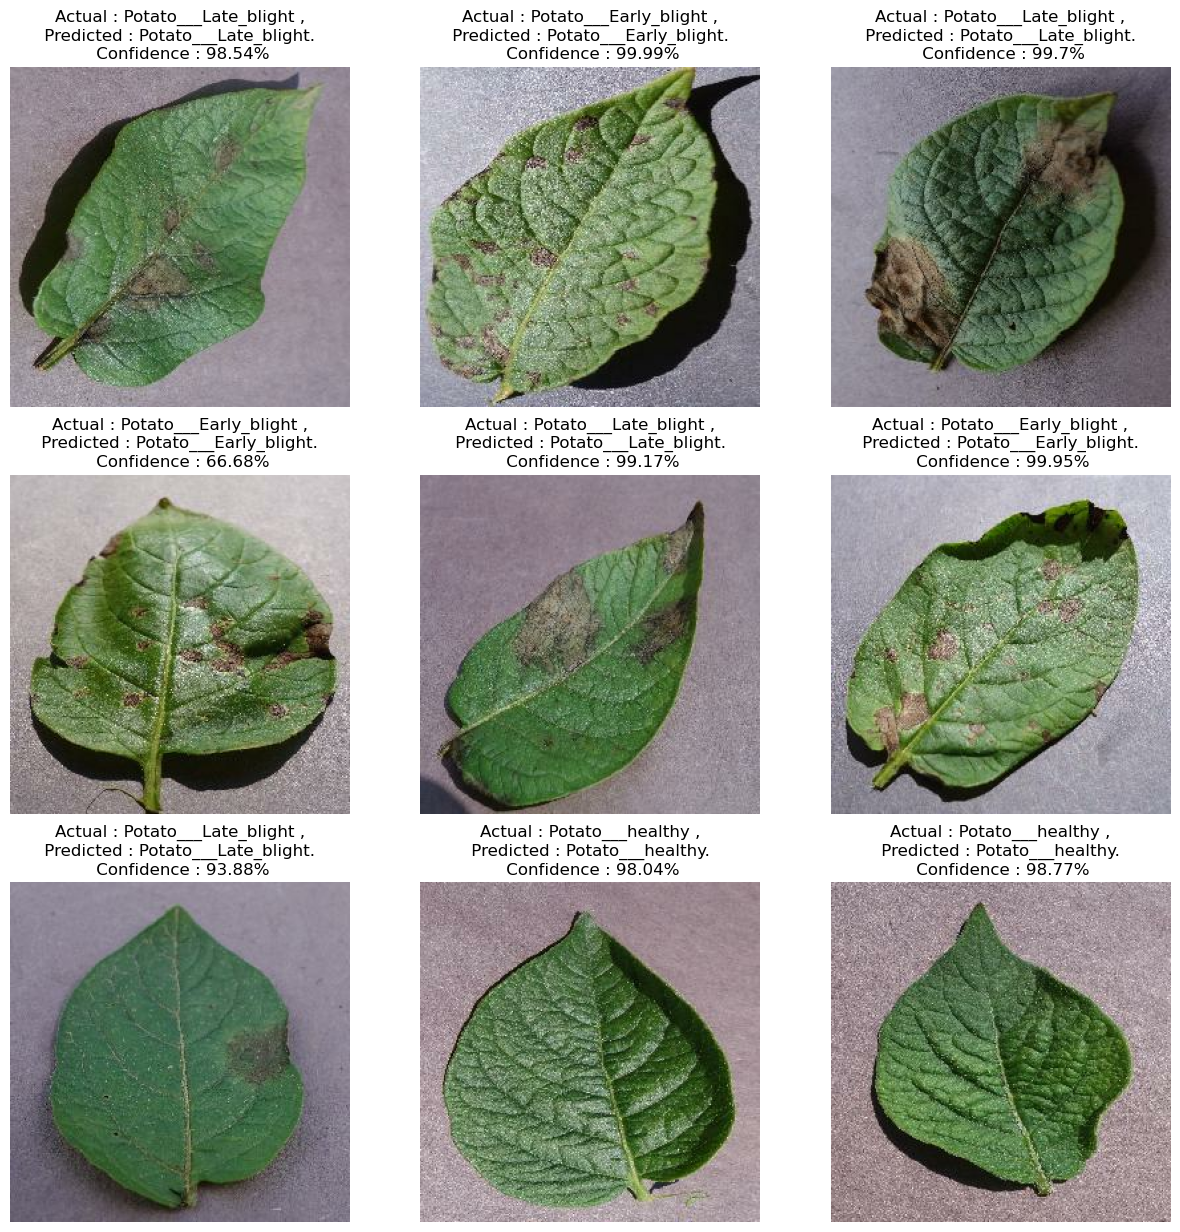

In [29]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class,confidence = predict(model , images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual : {actual_class} ,\n Predicted : {predicted_class}. \n Confidence : {confidence}%")
        plt.axis("off")

In [30]:

#import os
#model_version=max([int(i) for i in os.listdir("../models")+[0]])+1
#model.save(f"../models/{model_version}")

In [31]:

#model_version=1
#model.save(f"../models/{model_version}")



In [32]:
model.save('mymodel')

INFO:tensorflow:Assets written to: mymodel\assets


In [33]:
model.save('model.h5')